<a href="https://colab.research.google.com/github/Neha-J-m/Time-Series-Anaysis-of-Covid-19-Data/blob/main/Ds_Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Data Set Taken: https://covid.ourworldindata.org/data/owid-covid-data.csv

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,20)
import seaborn as sns
%matplotlib inline
df = pd.read_csv('/content/drive/MyDrive/Major Project/owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [ ]:
df.shape

(99776, 60)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99776 entries, 0 to 99775
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               99776 non-null  object 
 1   continent                              95098 non-null  object 
 2   location                               99776 non-null  object 
 3   date                                   99776 non-null  object 
 4   total_cases                            96182 non-null  float64
 5   new_cases                              96179 non-null  float64
 6   new_cases_smoothed                     95169 non-null  float64
 7   total_deaths                           86043 non-null  float64
 8   new_deaths                             86199 non-null  float64
 9   new_deaths_smoothed                    95169 non-null  float64
 10  total_cases_per_million                95670 non-null  float64
 11  ne

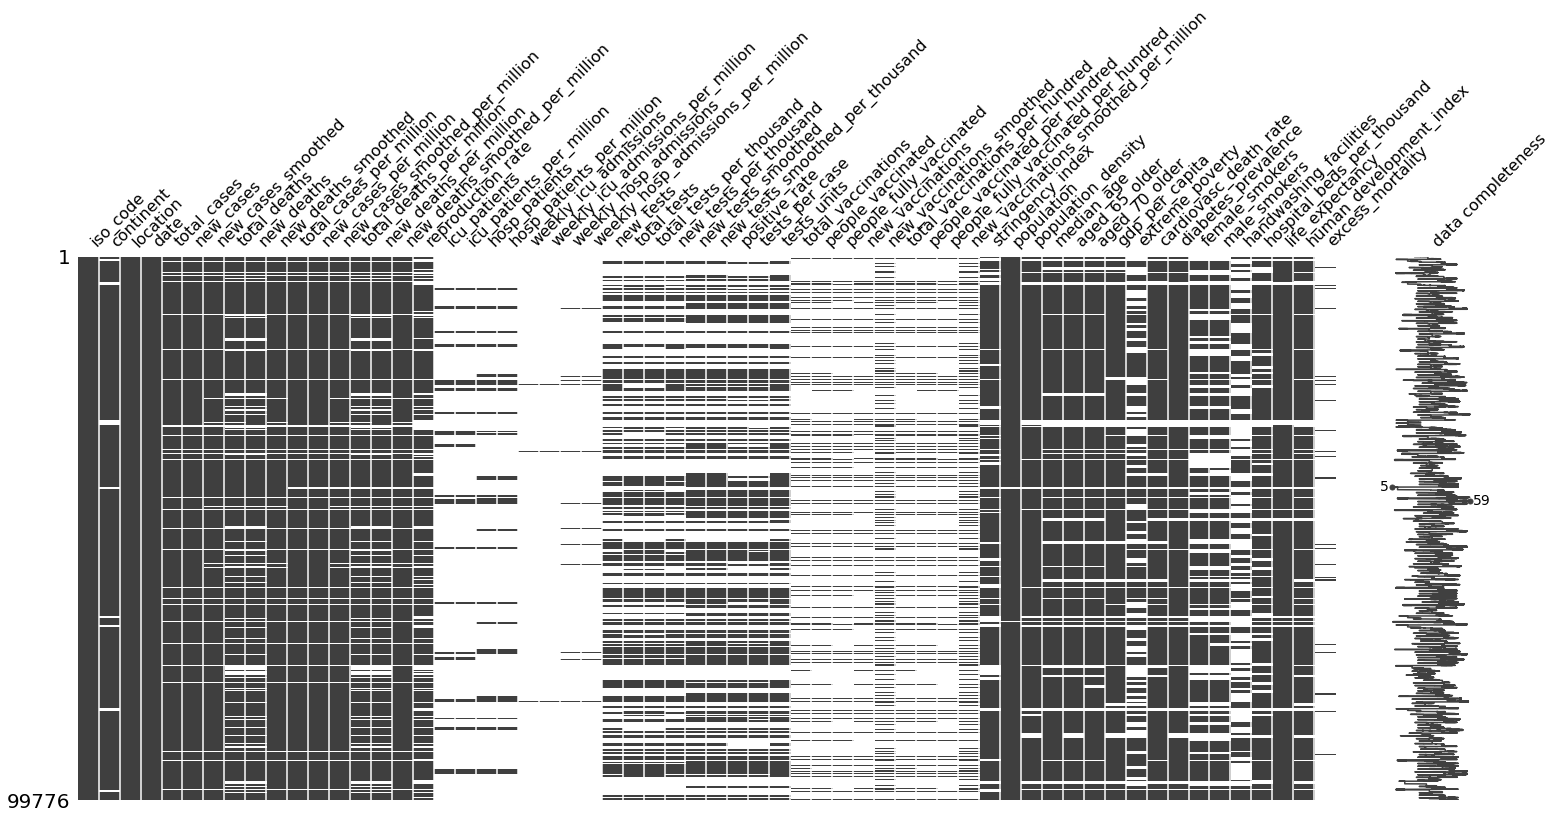

In [ ]:
import matplotlib.pyplot as plt
import missingno as msno
msno.matrix(df,labels=True);

In [ ]:
new1 = ['location','date','total_cases','new_cases','new_deaths','total_cases_per_million','new_cases_per_million','total_deaths_per_million',
        'new_deaths_per_million','new_tests','total_tests','positive_rate','total_vaccinations','people_vaccinated','people_fully_vaccinated',
        'new_vaccinations','new_vaccinations_smoothed','population','population_density','gdp_per_capita','extreme_poverty']
df1=df[new1].drop_duplicates().reset_index(drop=True)
df1.head(3)

,location,date,total_cases,new_cases,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,population,population_density,gdp_per_capita,extreme_poverty
0,Afghanistan,2020-02-24,1.0,1.0,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,1803.987,NaN
1,Afghanistan,2020-02-25,1.0,0.0,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,1803.987,NaN
2,Afghanistan,2020-02-26,1.0,0.0,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,1803.987,NaN


In [ ]:
df1.date=pd.to_datetime(df1.date)
min(df1.date)

Timestamp('2020-01-01 00:00:00')

In [ ]:
max(df1.date)

Timestamp('2021-07-02 00:00:00')

In [ ]:
df1.set_index("location", inplace = True)
df1 = df1.loc[["India", "Australia","Brazil","China","Japan","United States","Italy"]]
df1

,date,total_cases,new_cases,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,population,population_density,gdp_per_capita,extreme_poverty
location,,,,,,,,,,,,,,,,,,,,
India,2020-01-30,1.0,1.0,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,6426.674,21.2
India,2020-01-31,1.0,0.0,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,6426.674,21.2
India,2020-02-01,1.0,0.0,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,6426.674,21.2
India,2020-02-02,2.0,1.0,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,6426.674,21.2
India,2020-02-03,3.0,1.0,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,6426.674,21.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Italy,2021-06-28,4258456.0,387.0,28.0,70432.141,6.401,2108.769,0.463,75861.0,71207555.0,0.004,50508789.0,33600193.0,18132295.0,543131.0,546442.0,6.046183e+07,205.859,35220.084,2.0
Italy,2021-06-29,4259133.0,677.0,42.0,70443.338,11.197,2109.463,0.695,190635.0,71398190.0,0.004,51055180.0,33835990.0,18446490.0,546391.0,544270.0,6.046183e+07,205.859,35220.084,2.0
Italy,2021-06-30,4259909.0,776.0,24.0,70456.173,12.835,2109.860,0.397,185016.0,71583206.0,0.004,51609636.0,34069648.0,18772026.0,554456.0,543684.0,6.046183e+07,205.859,35220.084,2.0


In [ ]:
df1.reset_index(inplace=True)

In [ ]:
df1

,location,date,total_cases,new_cases,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,population,population_density,gdp_per_capita,extreme_poverty
0,India,2020-01-30,1.0,1.0,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,6426.674,21.2
1,India,2020-01-31,1.0,0.0,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,6426.674,21.2
2,India,2020-02-01,1.0,0.0,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,6426.674,21.2
3,India,2020-02-02,2.0,1.0,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,6426.674,21.2
4,India,2020-02-03,3.0,1.0,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,6426.674,21.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3635,Italy,2021-06-28,4258456.0,387.0,28.0,70432.141,6.401,2108.769,0.463,75861.0,71207555.0,0.004,50508789.0,33600193.0,18132295.0,543131.0,546442.0,6.046183e+07,205.859,35220.084,2.0
3636,Italy,2021-06-29,4259133.0,677.0,42.0,70443.338,11.197,2109.463,0.695,190635.0,71398190.0,0.004,51055180.0,33835990.0,18446490.0,546391.0,544270.0,6.046183e+07,205.859,35220.084,2.0
3637,Italy,2021-06-30,4259909.0,776.0,24.0,70456.173,12.835,2109.860,0.397,185016.0,71583206.0,0.004,51609636.0,34069648.0,18772026.0,554456.0,543684.0,6.046183e+07,205.859,35220.084,2.0
3638,Italy,2021-07-01,4260788.0,879.0,21.0,70470.711,14.538,2110.207,0.347,188474.0,71771680.0,0.004,52157100.0,34277463.0,19116624.0,547464.0,536622.0,6.046183e+07,205.859,35220.084,2.0


In [ ]:
df1.set_index("date",inplace=True)
df1.sort_index(ascending=True,inplace=True)
df1=df1.loc["2021-05-01":"2021-06-01"]
df1

,location,total_cases,new_cases,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,population,population_density,gdp_per_capita,extreme_poverty
date,,,,,,,,,,,,,,,,,,,,
2021-05-01,Italy,4035617.0,12964.0,226.0,66746.526,214.416,2001.808,3.738,378202.0,58957954.0,0.042,20605320.0,14520969.0,6167416.0,432998.0,411942.0,6.046183e+07,205.859,35220.084,2.0
2021-05-01,Brazil,14725975.0,66964.0,2656.0,69279.337,315.037,1912.110,12.495,NaN,NaN,NaN,43036179.0,29336953.0,13699226.0,337317.0,757933.0,2.125594e+08,25.040,14103.452,3.4
2021-05-01,China,90735.0,15.0,0.0,63.040,0.010,3.221,0.000,NaN,NaN,NaN,270406000.0,NaN,NaN,5342000.0,7156714.0,1.439324e+09,147.674,15308.712,0.7
2021-05-01,India,19557457.0,392488.0,3689.0,14172.025,284.411,156.189,2.673,1945299.0,288337385.0,0.214,153626325.0,126328970.0,27297355.0,1628218.0,2369239.0,1.380004e+09,450.419,6426.674,21.2
2021-05-01,Japan,599253.0,5989.0,82.0,4738.060,47.353,81.288,0.648,68323.0,11287751.0,0.071,4095053.0,3052055.0,1042998.0,29633.0,175595.0,1.264765e+08,347.778,39002.223,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-01,China,91197.0,24.0,0.0,63.361,0.017,3.221,0.000,NaN,NaN,NaN,681908000.0,NaN,NaN,20440000.0,19313429.0,1.439324e+09,147.674,15308.712,0.7
2021-06-01,Australia,30124.0,6.0,0.0,1181.339,0.235,35.686,0.000,65263.0,18463955.0,0.000,4362739.0,3859771.0,502968.0,119139.0,96017.0,2.549988e+07,3.202,44648.710,0.5
2021-06-01,United States,33290532.0,22940.0,648.0,100574.821,69.305,1797.983,1.958,698756.0,450681090.0,0.024,296404240.0,168489729.0,135867425.0,NaN,1230767.0,3.310026e+08,35.608,54225.446,1.2


In [ ]:
df1.reset_index(inplace=True)
df1

,date,location,total_cases,new_cases,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,population,population_density,gdp_per_capita,extreme_poverty
0,2021-05-01,Italy,4035617.0,12964.0,226.0,66746.526,214.416,2001.808,3.738,378202.0,58957954.0,0.042,20605320.0,14520969.0,6167416.0,432998.0,411942.0,6.046183e+07,205.859,35220.084,2.0
1,2021-05-01,Brazil,14725975.0,66964.0,2656.0,69279.337,315.037,1912.110,12.495,NaN,NaN,NaN,43036179.0,29336953.0,13699226.0,337317.0,757933.0,2.125594e+08,25.040,14103.452,3.4
2,2021-05-01,China,90735.0,15.0,0.0,63.040,0.010,3.221,0.000,NaN,NaN,NaN,270406000.0,NaN,NaN,5342000.0,7156714.0,1.439324e+09,147.674,15308.712,0.7
3,2021-05-01,India,19557457.0,392488.0,3689.0,14172.025,284.411,156.189,2.673,1945299.0,288337385.0,0.214,153626325.0,126328970.0,27297355.0,1628218.0,2369239.0,1.380004e+09,450.419,6426.674,21.2
4,2021-05-01,Japan,599253.0,5989.0,82.0,4738.060,47.353,81.288,0.648,68323.0,11287751.0,0.071,4095053.0,3052055.0,1042998.0,29633.0,175595.0,1.264765e+08,347.778,39002.223,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2021-06-01,China,91197.0,24.0,0.0,63.361,0.017,3.221,0.000,NaN,NaN,NaN,681908000.0,NaN,NaN,20440000.0,19313429.0,1.439324e+09,147.674,15308.712,0.7
220,2021-06-01,Australia,30124.0,6.0,0.0,1181.339,0.235,35.686,0.000,65263.0,18463955.0,0.000,4362739.0,3859771.0,502968.0,119139.0,96017.0,2.549988e+07,3.202,44648.710,0.5
221,2021-06-01,United States,33290532.0,22940.0,648.0,100574.821,69.305,1797.983,1.958,698756.0,450681090.0,0.024,296404240.0,168489729.0,135867425.0,NaN,1230767.0,3.310026e+08,35.608,54225.446,1.2
222,2021-06-01,India,28307832.0,132788.0,3207.0,20512.857,96.223,242.827,2.324,1925374.0,346792257.0,0.081,213135738.0,169585180.0,43550558.0,2685843.0,2518423.0,1.380004e+09,450.419,6426.674,21.2


In [ ]:
df1.isnull().sum()

date                         0
location                     0
total_cases                  0
new_cases                    0
new_deaths                   0
total_cases_per_million      0
new_cases_per_million        0
total_deaths_per_million     0
new_deaths_per_million       0
new_tests                    0
total_tests                  0
positive_rate                0
total_vaccinations           0
people_vaccinated            0
people_fully_vaccinated      0
new_vaccinations             0
new_vaccinations_smoothed    0
population                   0
population_density           0
gdp_per_capita               0
extreme_poverty              0
dtype: int64

In [ ]:
df1.fillna(value=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
df1.drop(['new_cases_per_million', 'total_deaths_per_million','new_deaths_per_million','new_vaccinations_smoothed', 'population',
       'population_density', 'gdp_per_capita', 'extreme_poverty'],inplace=True,axis=1)
df1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,location,total_cases,new_cases,new_deaths,total_cases_per_million,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
0,2021-05-01,Italy,4035617.0,12964.0,226.0,66746.526,378202.0,58957954.0,0.042,20605320.0,14520969.0,6167416.0,432998.0
1,2021-05-01,Brazil,14725975.0,66964.0,2656.0,69279.337,0.0,0.0,0.000,43036179.0,29336953.0,13699226.0,337317.0
2,2021-05-01,China,90735.0,15.0,0.0,63.040,0.0,0.0,0.000,270406000.0,0.0,0.0,5342000.0
3,2021-05-01,India,19557457.0,392488.0,3689.0,14172.025,1945299.0,288337385.0,0.214,153626325.0,126328970.0,27297355.0,1628218.0
4,2021-05-01,Japan,599253.0,5989.0,82.0,4738.060,68323.0,11287751.0,0.071,4095053.0,3052055.0,1042998.0,29633.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2021-06-01,China,91197.0,24.0,0.0,63.361,0.0,0.0,0.000,681908000.0,0.0,0.0,20440000.0
220,2021-06-01,Australia,30124.0,6.0,0.0,1181.339,65263.0,18463955.0,0.000,4362739.0,3859771.0,502968.0,119139.0
221,2021-06-01,United States,33290532.0,22940.0,648.0,100574.821,698756.0,450681090.0,0.024,296404240.0,168489729.0,135867425.0,0.0
222,2021-06-01,India,28307832.0,132788.0,3207.0,20512.857,1925374.0,346792257.0,0.081,213135738.0,169585180.0,43550558.0,2685843.0


Text(0.5, 1.0, ' Countrty wise Covid-19 Cases')

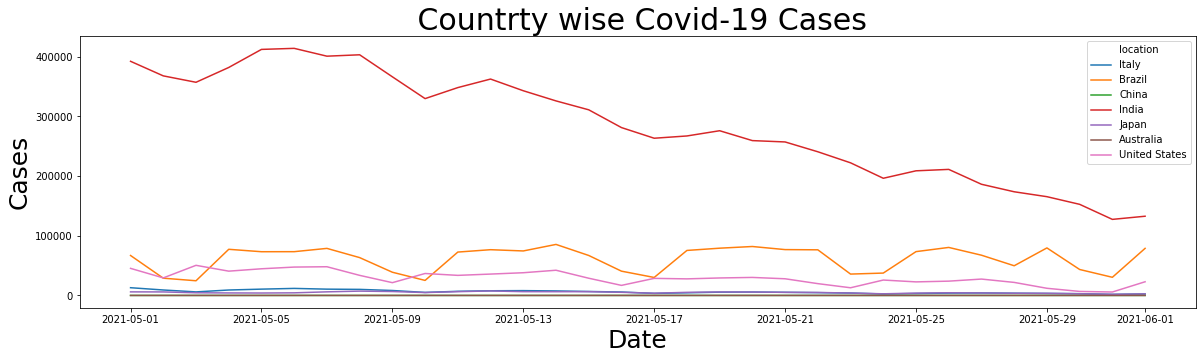

In [ ]:
#Covid Cases
plt.figure(figsize=(20,5))
sns.lineplot(x="date", y="new_cases",hue="location", data=df1);
plt.xlabel("Date", size=25)
plt.ylabel("Cases", size=25)
plt.title(" Countrty wise Covid-19 Cases", size=30)

Text(0.5, 1.0, ' Countrty wise Covid-19 deaths')

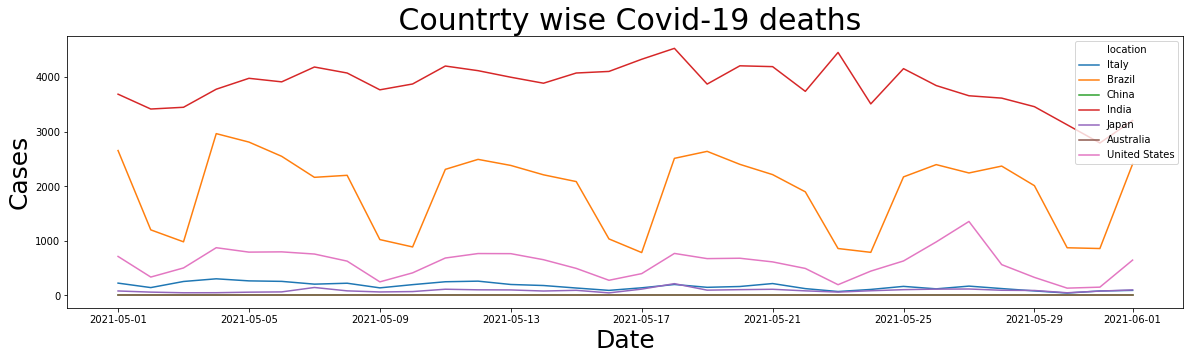

In [ ]:
#Covid deaths
plt.figure(figsize=(20,5))
sns.lineplot(x="date", y="new_deaths",hue="location", data=df1);
plt.xlabel("Date", size=25)
plt.ylabel("Cases", size=25)
plt.title(" Countrty wise Covid-19 deaths", size=30)

Text(0.5, 1.0, ' Countrty wise People Vaccinated ')

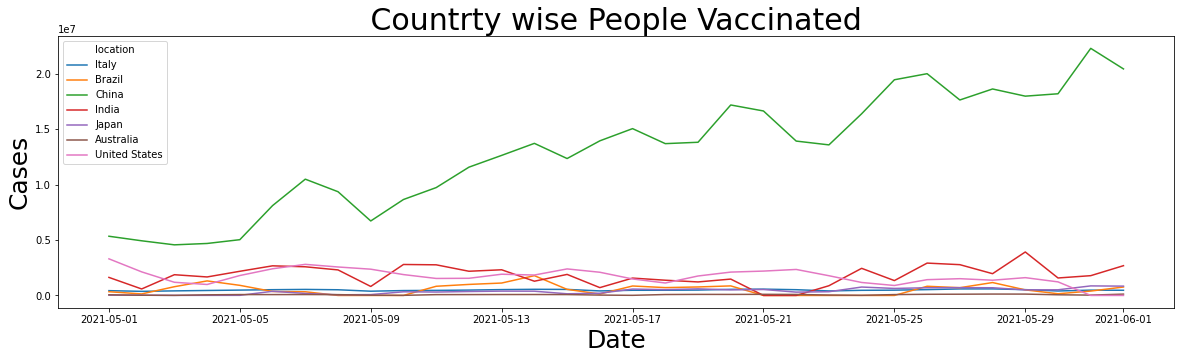

In [ ]:
#Covid Vaccinations
plt.figure(figsize=(20,5))
sns.lineplot(x="date", y="new_vaccinations",hue="location", data=df1);
plt.xlabel("Date", size=25)
plt.ylabel("Cases", size=25)
plt.title(" Countrty wise People Vaccinated ", size=30)

In [ ]:
df2=df1.copy()


In [ ]:
df2.set_index("location", inplace = True)
df2 = df2.loc[["India"]]
df2

,date,total_cases,new_cases,new_deaths,total_cases_per_million,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
location,,,,,,,,,,,,
India,2021-05-01,19557457.0,392488.0,3689.0,14172.025,1945299.0,288337385.0,0.214,153626325.0,126328970.0,27297355.0,1628218.0
India,2021-05-02,19925517.0,368060.0,3417.0,14438.735,1804954.0,290142339.0,0.214,154211511.0,126704151.0,27507360.0,585186.0
India,2021-05-03,20282833.0,357316.0,3449.0,14697.658,1504698.0,291647037.0,0.215,156082136.0,127696675.0,28385461.0,1870625.0
India,2021-05-04,20664979.0,382146.0,3780.0,14974.575,1663742.0,293310779.0,0.216,157750752.0,128627919.0,29122833.0,1668616.0
India,2021-05-05,21077410.0,412431.0,3980.0,15273.437,1541299.0,294852078.0,0.222,159931238.0,129730641.0,30200597.0,2180486.0
India,2021-05-06,21491598.0,414188.0,3915.0,15573.572,1923131.0,296775209.0,0.222,162603603.0,131058890.0,31544713.0,2672365.0
India,2021-05-07,21892676.0,401078.0,4187.0,15864.208,1826490.0,298601699.0,0.223,165190000.0,132294827.0,32895173.0,2586397.0
India,2021-05-08,22296081.0,403405.0,4077.0,16156.529,1808344.0,300410043.0,0.227,167493857.0,133366482.0,34127375.0,2303857.0
India,2021-05-09,22662575.0,366494.0,3769.0,16422.104,1865428.0,302275471.0,0.226,168304868.0,133854676.0,34450192.0,811011.0


# **FORECASTING** 

# New Deaths

In [ ]:
#Covid Deaths
df2a=df2[['date','new_deaths']]
df2a['date']=pd.to_datetime(df2a['date'])
df2a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, India to India
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        32 non-null     datetime64[ns]
 1   new_deaths  32 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 768.0+ bytes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ds,y
location,,
India,2021-05-01,3689.0
India,2021-05-02,3417.0
India,2021-05-03,3449.0
India,2021-05-04,3780.0
India,2021-05-05,3980.0
India,2021-05-06,3915.0
India,2021-05-07,4187.0
India,2021-05-08,4077.0
India,2021-05-09,3769.0


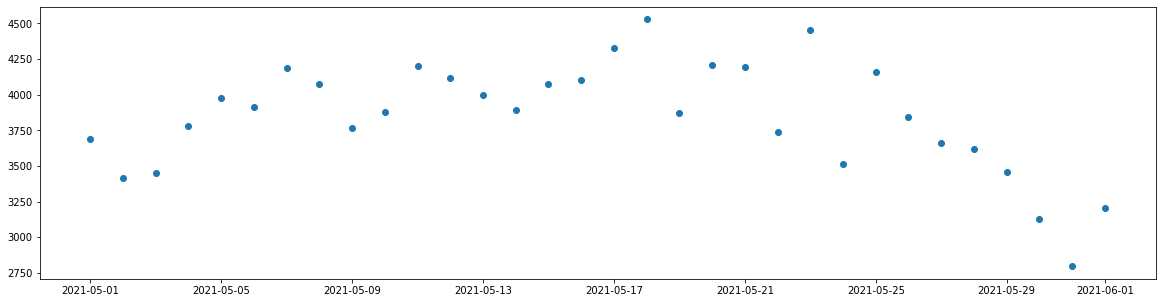

In [ ]:
import matplotlib.pyplot as plt
df2a=df2a.rename(columns={df2a.columns[0]:'ds',df2a.columns[1]:'y'})
plt.figure(figsize=(20,5))
plt.scatter(df2a['ds'],df2a['y'])
df2a

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


           ds        trend  ...  multiplicative_terms_upper         yhat
0  2021-05-01  3582.442611  ...                         0.0  3559.416371
1  2021-05-02  3641.930715  ...                         0.0  3591.497286
2  2021-05-03  3701.418820  ...                         0.0  3491.402328
3  2021-05-04  3760.906926  ...                         0.0  3966.252298
4  2021-05-05  3820.395032  ...                         0.0  3829.515391
..        ...          ...  ...                         ...          ...
57 2021-06-27  -209.834585  ...                         0.0  -260.268014
58 2021-06-28  -333.640732  ...                         0.0  -543.657224
59 2021-06-29  -457.446879  ...                         0.0  -252.101507
60 2021-06-30  -581.253026  ...                         0.0  -572.132667
61 2021-07-01  -705.059173  ...                         0.0  -690.769468

[62 rows x 16 columns]


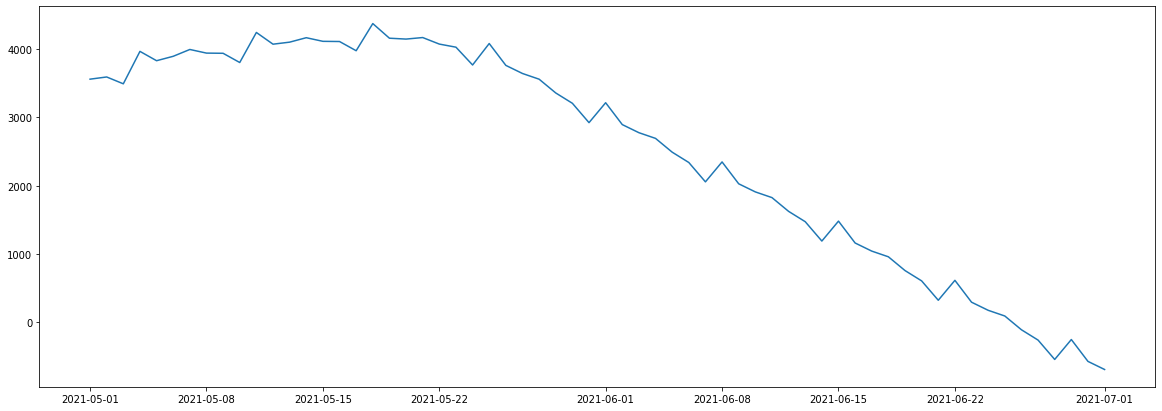

In [ ]:
from fbprophet import Prophet
model=Prophet(changepoint_prior_scale=0.4)
model.fit(df2a)
x=model.make_future_dataframe(periods=30,freq='D')
forecast=model.predict(x)
plt.figure(figsize=(20,7))
plt.plot(forecast['ds'], forecast['yhat'])
print(forecast)

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2021-05-01,3559.416371,3346.206122,3769.952692
1,2021-05-02,3591.497286,3388.527763,3810.936631
2,2021-05-03,3491.402328,3264.152039,3694.345993
3,2021-05-04,3966.252298,3737.956367,4184.294542
4,2021-05-05,3829.515391,3624.506480,4034.234859
...,...,...,...,...
57,2021-06-27,-260.268014,-1145.539599,640.626722
58,2021-06-28,-543.657224,-1525.147066,442.974677
59,2021-06-29,-252.101507,-1248.689913,744.818551
60,2021-06-30,-572.132667,-1591.950182,493.418912


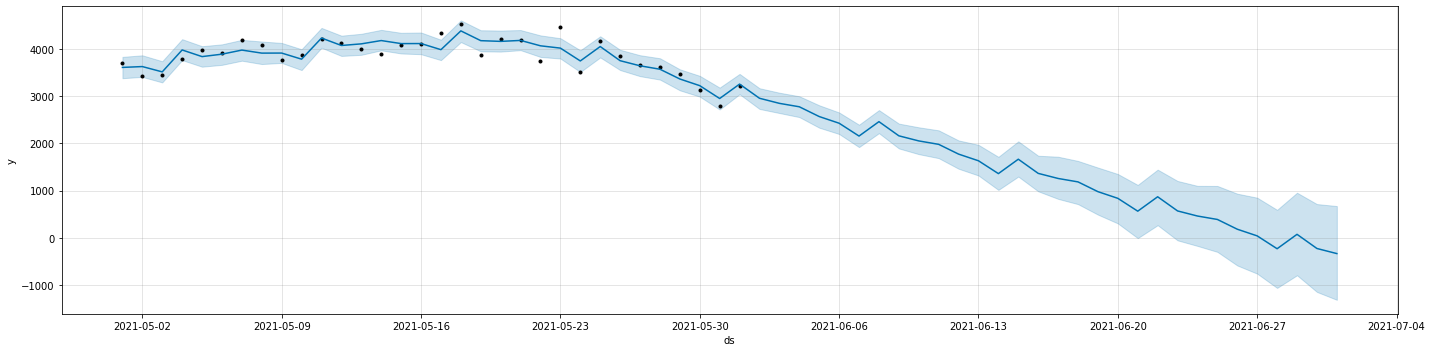

In [ ]:
model.plot(forecast,figsize=(20,5));

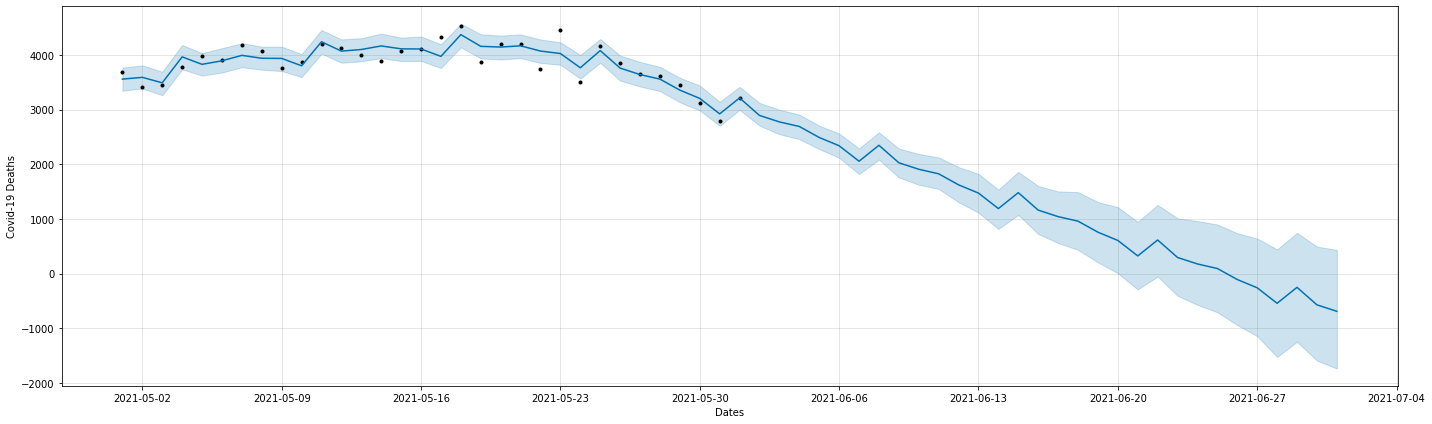

In [ ]:
model.plot(forecast,figsize=(20,6), xlabel='Dates', ylabel='Covid-19 Deaths');

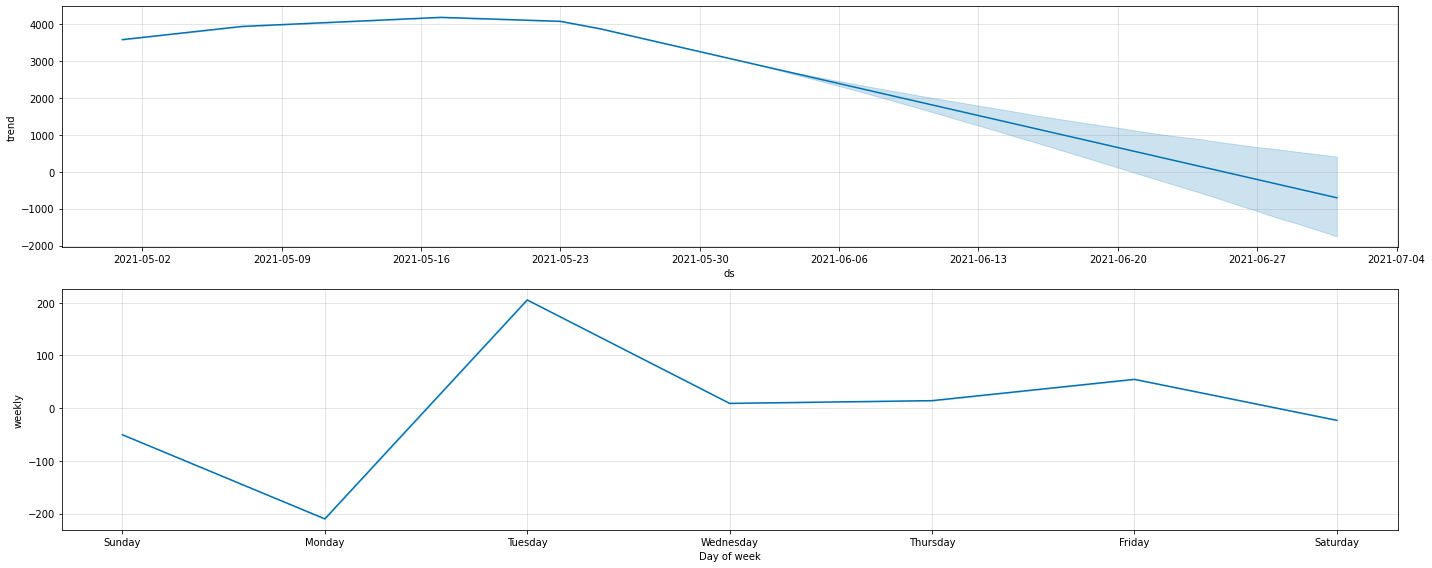

In [ ]:
model.plot_components(forecast, figsize=(20,8));

# New Cases

In [ ]:
#Covid Cases
df2b=df2[['date','new_cases']]
df2b['date']=pd.to_datetime(df2b['date'])
df2b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, India to India
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       32 non-null     datetime64[ns]
 1   new_cases  32 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
location,,
India,2021-05-01,392488.0
India,2021-05-02,368060.0
India,2021-05-03,357316.0
India,2021-05-04,382146.0
India,2021-05-05,412431.0
India,2021-05-06,414188.0
India,2021-05-07,401078.0
India,2021-05-08,403405.0
India,2021-05-09,366494.0


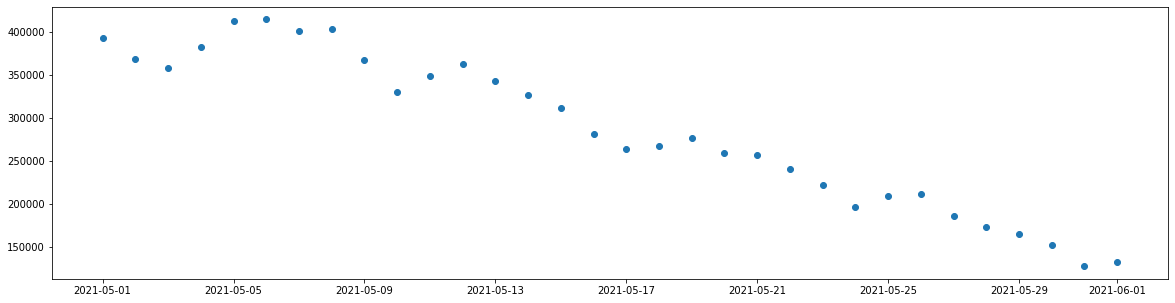

In [ ]:
import matplotlib.pyplot as plt
df2b=df2b.rename(columns={df2b.columns[0]:'ds',df2b.columns[1]:'y'})
plt.figure(figsize=(20,5))
plt.scatter(df2b['ds'],df2b['y'])
df2b

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


           ds          trend  ...  multiplicative_terms_upper      yhat
0  2021-05-01  391226.000000  ...                         0.0  392488.0
1  2021-05-02  368740.857143  ...                         0.0  368060.0
2  2021-05-03  372344.714286  ...                         0.0  357316.0
3  2021-05-04  381020.571429  ...                         0.0  382146.0
4  2021-05-05  398052.428571  ...                         0.0  412431.0
..        ...            ...  ...                         ...       ...
57 2021-06-27 -151117.142857  ...                         0.0 -151798.0
58 2021-06-28 -161993.285714  ...                         0.0 -177022.0
59 2021-06-29 -172869.428571  ...                         0.0 -171744.0
60 2021-06-30 -183745.571428  ...                         0.0 -169367.0
61 2021-07-01 -194621.714285  ...                         0.0 -194301.0

[62 rows x 16 columns]


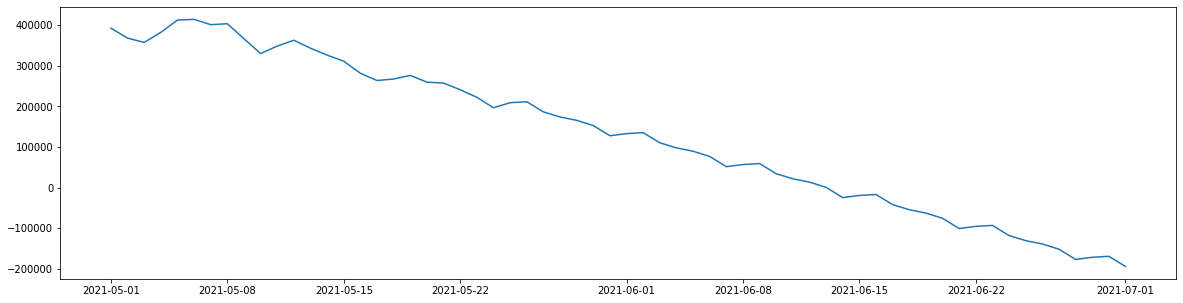

In [ ]:
from fbprophet import Prophet
model2=Prophet(changepoint_prior_scale=0.9)
model2.fit(df2b)
x=model2.make_future_dataframe(periods=30,freq='D')
forecast2=model2.predict(x)
plt.figure(figsize=(20,5))
plt.plot(forecast2['ds'], forecast2['yhat'])
print(forecast2)

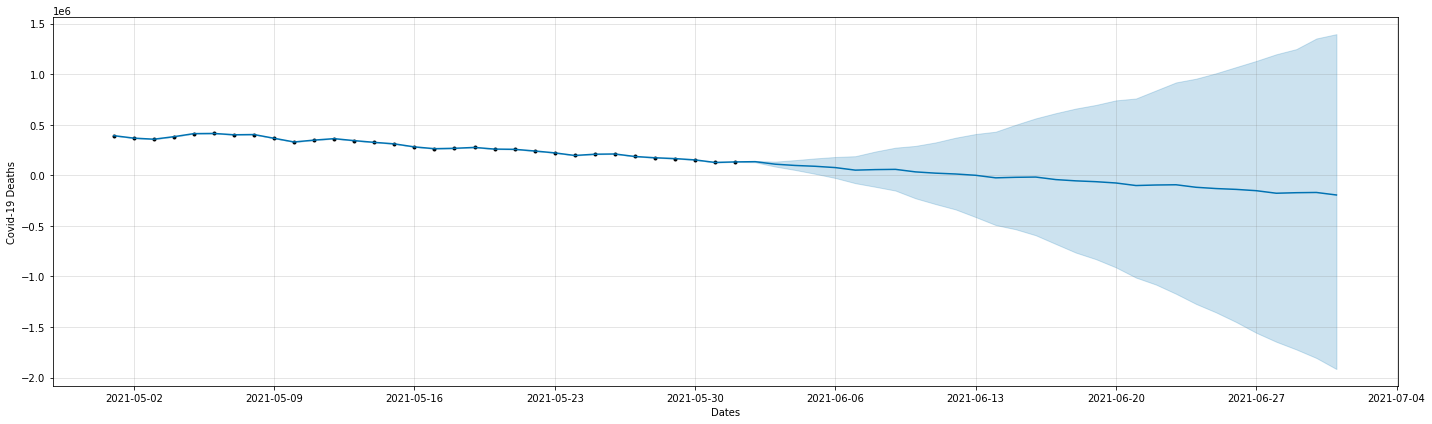

In [ ]:
model2.plot(forecast2,figsize=(20,6), xlabel='Dates', ylabel='Covid-19 Deaths');

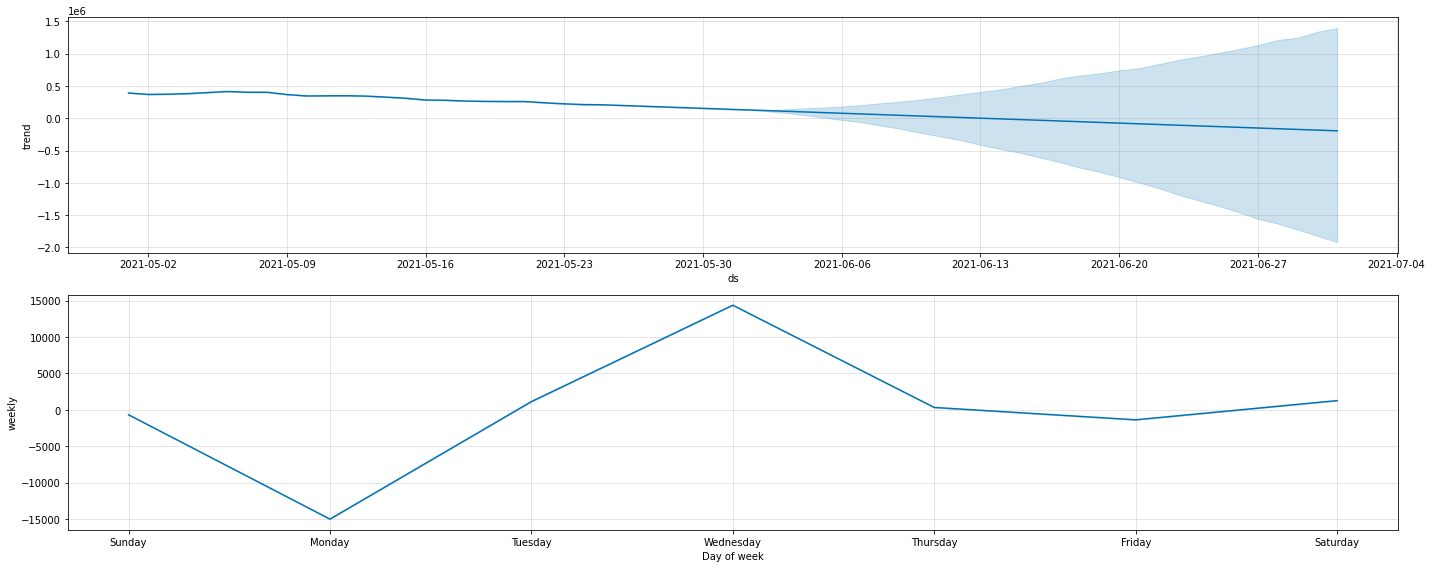

In [ ]:
model2.plot_components(forecast2, figsize=(20,8));

# New Vaccinations

In [ ]:
df2c=df2[['date','new_vaccinations']]
df2c['date']=pd.to_datetime(df2c['date'])
df2c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, India to India
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              32 non-null     datetime64[ns]
 1   new_vaccinations  32 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



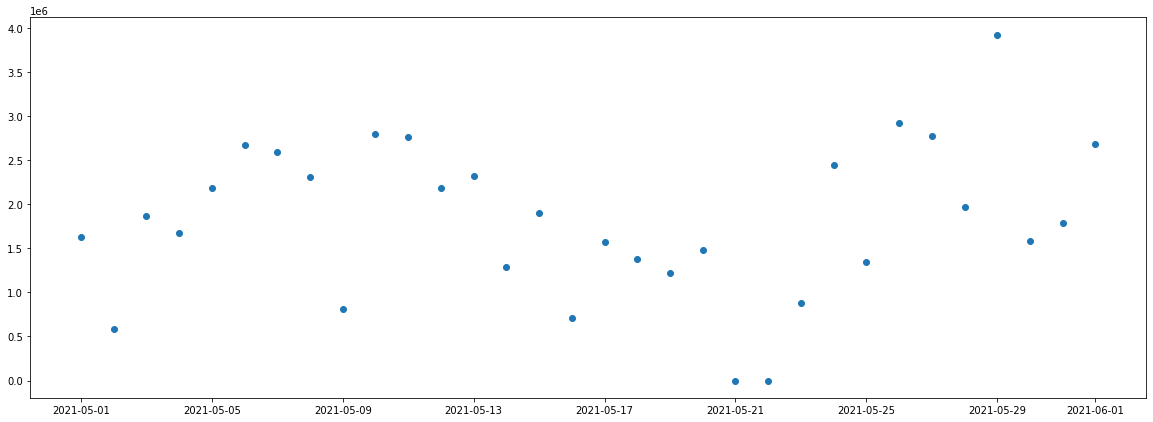

In [ ]:
import matplotlib.pyplot as plt
df2c=df2c.rename(columns={df2c.columns[0]:'ds', df2c.columns[1]:'y'})
plt.figure(figsize=(20,7))
plt.scatter(df2c['ds'], df2c['y'])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


           ds         trend  ...  multiplicative_terms_upper          yhat
0  2021-05-01  1.570862e+06  ...                         0.0  1.737974e+06
1  2021-05-02  1.667716e+06  ...                         0.0  7.231947e+05
2  2021-05-03  1.764569e+06  ...                         0.0  1.929058e+06
3  2021-05-04  1.861423e+06  ...                         0.0  1.854865e+06
4  2021-05-05  1.958277e+06  ...                         0.0  2.337174e+06
..        ...           ...  ...                         ...           ...
57 2021-06-27  7.583088e+06  ...                         0.0  6.638566e+06
58 2021-06-28  7.762110e+06  ...                         0.0  7.926599e+06
59 2021-06-29  7.941133e+06  ...                         0.0  7.934575e+06
60 2021-06-30  8.120155e+06  ...                         0.0  8.499052e+06
61 2021-07-01  8.299178e+06  ...                         0.0  8.851433e+06

[62 rows x 16 columns]


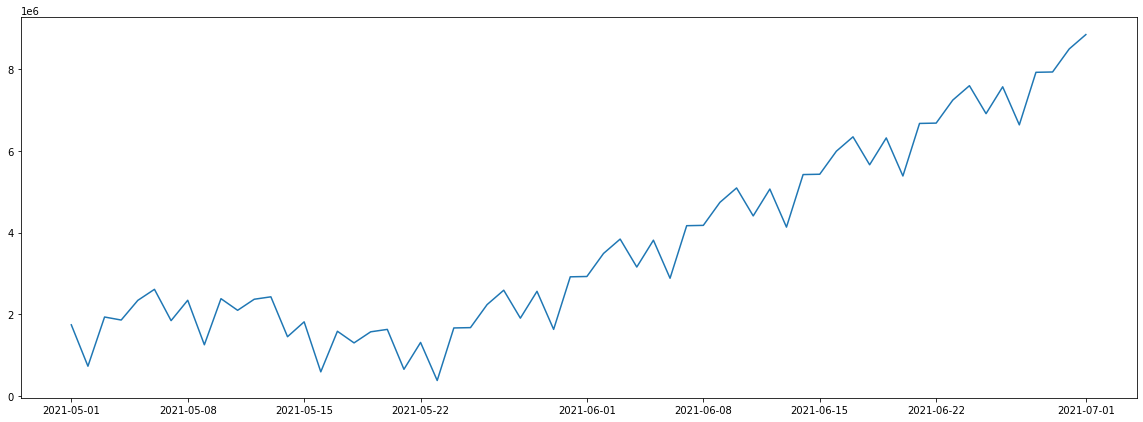

In [ ]:
from fbprophet import Prophet
model3= Prophet(changepoint_prior_scale=0.9)
model3.fit(df2c)
x3= model3.make_future_dataframe(periods=30,freq='D')
forecast3=model3.predict(x)
plt.figure(figsize=(20,7))
plt.plot(forecast3['ds'], forecast3['yhat'])
print(forecast3)

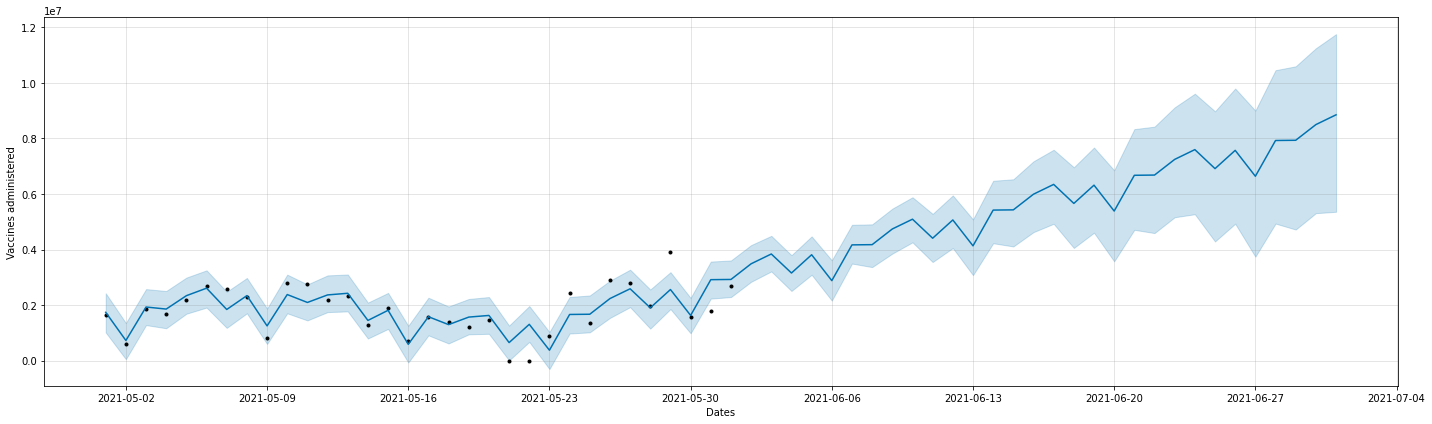

In [ ]:
model3.plot(forecast3,figsize=(20,6), xlabel='Dates', ylabel='Vaccines administered');